# Amplication factor for the box averaging scheme

$$A = \frac{1}{(2 M + 1)^2} \left( \sum_{n=1}^M \sum_{m=1}^M 4 \cos n k h \cos m q h + \sum_{n=1}^M 2 \cos n k h + \sum_{m=1}^M 2 \cos m q h + 1\right)$$
where:
$M$ is the stencil depth $\geq 1$


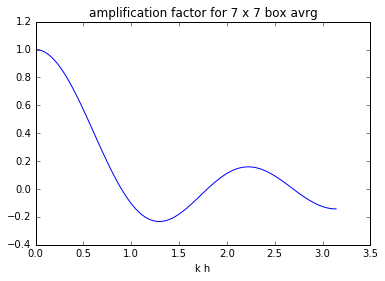

In [13]:
% matplotlib inline
from matplotlib import pylab
import numpy

kh = numpy.linspace(0., numpy.pi, 100)
qh = 0
M = 3
numCells = (2*M + 1)**2

a = numpy.ones(kh.shape, kh.dtype)

for m in range(1, M + 1):
    a += 2 * numpy.cos(m * qh)
    
for n in range(1, M + 1):
    a += 2 * numpy.cos(n * kh)
    
for n in range(1, M + 1):
    for m in range(1, M + 1):
        a += 4 * numpy.cos(n * kh) * numpy.cos(m * qh)
        
a /= float(numCells)
        
pylab.plot(kh, a)
pylab.title('amplification factor for {} x {} box avrg'.format(2*M + 1, 2*M+1))
pylab.xlabel('k h')


In [12]:
print(numCells)


5
